In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import Modules
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
# Import Custom Modules
from src.eda_helper import *
from src.graph_helper import *

In [4]:
# Global Variables
FIGSIZE = np.array([12, 8])

In [5]:
# Import Data for Vis
data = pd.read_csv('data/train.csv')

In [6]:
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


# Check Distribution of Targets/Labels

> We can see that we have sufficient data for both cases to not have to worry about using SMOTE or data-imbalance

Graph Distribution of Targets labeled


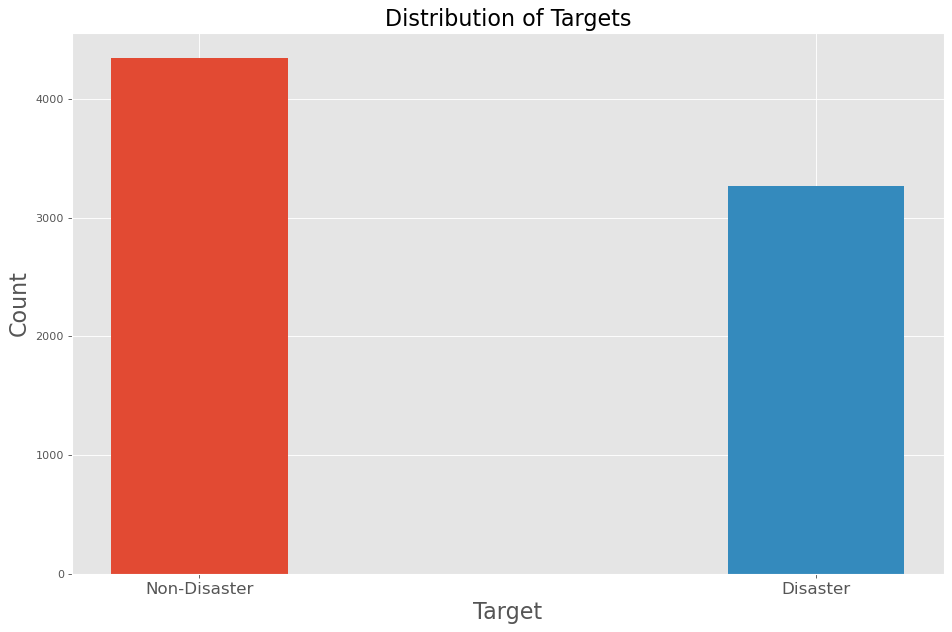

In [7]:
# Plot Distribution of Targets
fig, ax = plt.subplots(dpi=80, figsize=FIGSIZE)

plot_data = [np.full((sum(data['target'] == 0)), 0), np.full((sum(data['target'] == 1)), 1)]

ax.hist(plot_data, bins=2)
set_labels(ax, 'Distribution of Targets', 'Target', 'Count', 20)

ax.set_xticklabels(['Non-Disaster', 'Disaster'], fontsize=15)
ax.set_xticks(np.array([0.15, 0.85]))


fig.tight_layout()

# Exploring Null Data 
> Features: 'keyword', 'location'

In [8]:
loc_null = get_null_percentage(data, 'location')

print(f'Missing Data from "location" feature: {loc_null * 100}%')

Missing Data from "location" feature: 33.0%


# Use Geoparsing to find null location data through tweet

In [80]:
# Import GeoText module to parse locations in blocks of text
from geotext import GeoText
from collections import Counter

def get_country(text:str) -> list:
    if pd.notnull(text):
        res = []
        for loc, cnt in GeoText(text).country_mentions.items():
            res += [loc for i in range(cnt)]
        return res
    return None

def get_cities(text:str) -> list:
    if pd.notnull(text):
        return GeoText(text).cities
    return None

def clean_locale(loc_data:list) -> str:
    cnt = Counter(loc_data)
    return cnt.most_common(1)[0][0]

def get_locale(df:pd.DataFrame, target_cols:list, inplace:bool=True) -> None:
    '''Creates new column in dataframe of location dumps via parsing through target columns'''
    df_cop = df.copy()
    for i in range(df_cop.shape[0]):
        to_parse = data.iloc[i][target_cols]
        
    
    if not inplace:
        return df_cop
    else:
        df['locale_dump'] = df_cop['locale_dump']

        
trg_cols = ['location', 'text']

In [81]:
get_country(data.iloc[12]['text'])

['UY', 'US']

In [82]:
test_str = 'United States United States United States United Kingdom, Canada, Canada'
# GeoText(test_str).country_mentions
res = get_country(test_str)
clean_locale(res)

'US'

In [13]:
parse_city(data.iloc[12]['text'])

['Florida', 'Tampa']

In [40]:
for i in range(data.shape[0]):
    print(data.iloc[i][['text', 'location']])
    break

text        Our Deeds are the Reason of this #earthquake M...
location                                                  NaN
Name: 0, dtype: object


In [39]:
for i in data.iloc[0][['text', 'location']]:
    print(i)

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
nan


In [30]:
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
